## Chargement des données :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")

data_path = '/opt/airflow/data/raw/us_airline_sentiment_raw.csv'

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f" Données chargées : {len(df)} avis.")
else:
    print(" Erreur .")


 Données chargées : 14640 avis.


## Répartition des sentiments :


In [ ]:
print("------> Répartition des Sentiments ")
sentiment_counts = df['airline_sentiment'].value_counts()
print(sentiment_counts)
print("\nEn pourcentage :")
print(df['airline_sentiment'].value_counts(normalize=True) * 100)


------> Répartition des Sentiments 

En pourcentage :
airline_sentiment
negative    62.691257
neutral     21.168033
positive    16.140710
Name: proportion, dtype: float64


La table montre combien d'avis sont positifs, négatifs ou neutres. Utilisez le pourcentage pour juger l'équilibre du jeu de données — un fort déséquilibre peut nécessiter un rééchantillonnage lors de l'entraînement.

## Nombre d'avis par compagnie

In [13]:

print("\n--- Nombre d'avis par Compagnie ---")
print(df['airline'].value_counts())



--- Nombre d'avis par Compagnie ---
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


Cette sortie indique quelles compagnies ont le plus de tweets. Les compagnies avec peu d'avis peuvent produire des résultats moins robustes pour l'analyse par compagnie.

# Visualisation : tweets par compagnie

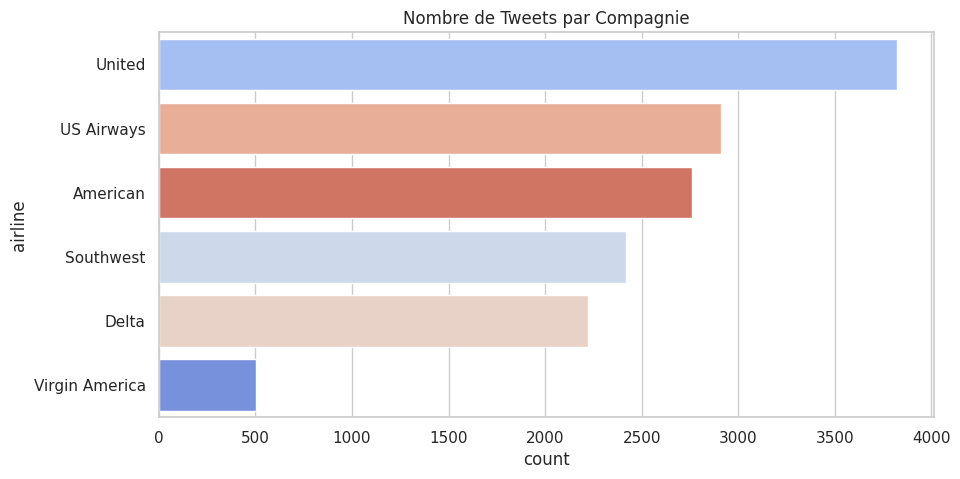

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(
    y='airline',
    data=df,
    order=df['airline'].value_counts().index,
    hue='airline',
    palette='coolwarm',
    legend=False
)
plt.title('Nombre de Tweets par Compagnie')
plt.show()

Ce graphique montre la proportion de sentiments pour chaque compagnie. Recherchez des compagnies avec beaucoup de sentiments négatifs — elles peuvent nécessiter une analyse qualitative pour comprendre les causes.

## Distribution des sentiments par compagnie (sous-graphes)

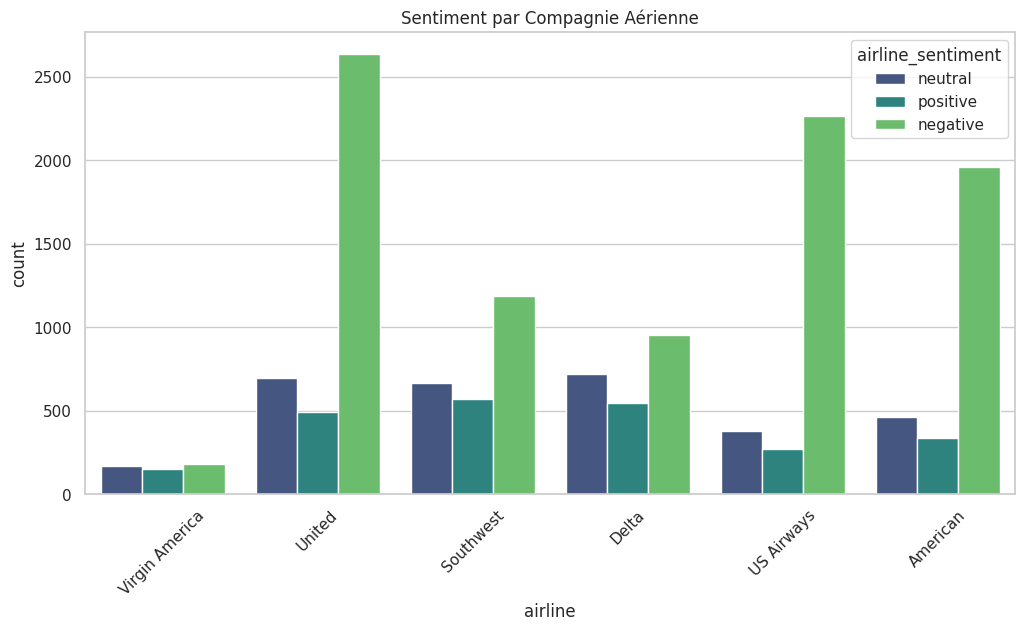

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment par Compagnie Aérienne')
plt.xticks(rotation=45)
plt.show()

### Sentiments des compagnies aériennes pour chaque compagnie

* Tout d’abord, calculons le nombre total de tweets pour chaque compagnie aérienne.

* Ensuite, nous allons générer des diagrammes en barres pour chaque compagnie en fonction des sentiments des tweets (positif, négatif ou neutre).

* Cela nous donnera une vision plus claire des sentiments associés aux compagnies aériennes et de leur relation avec les avis des clients.

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


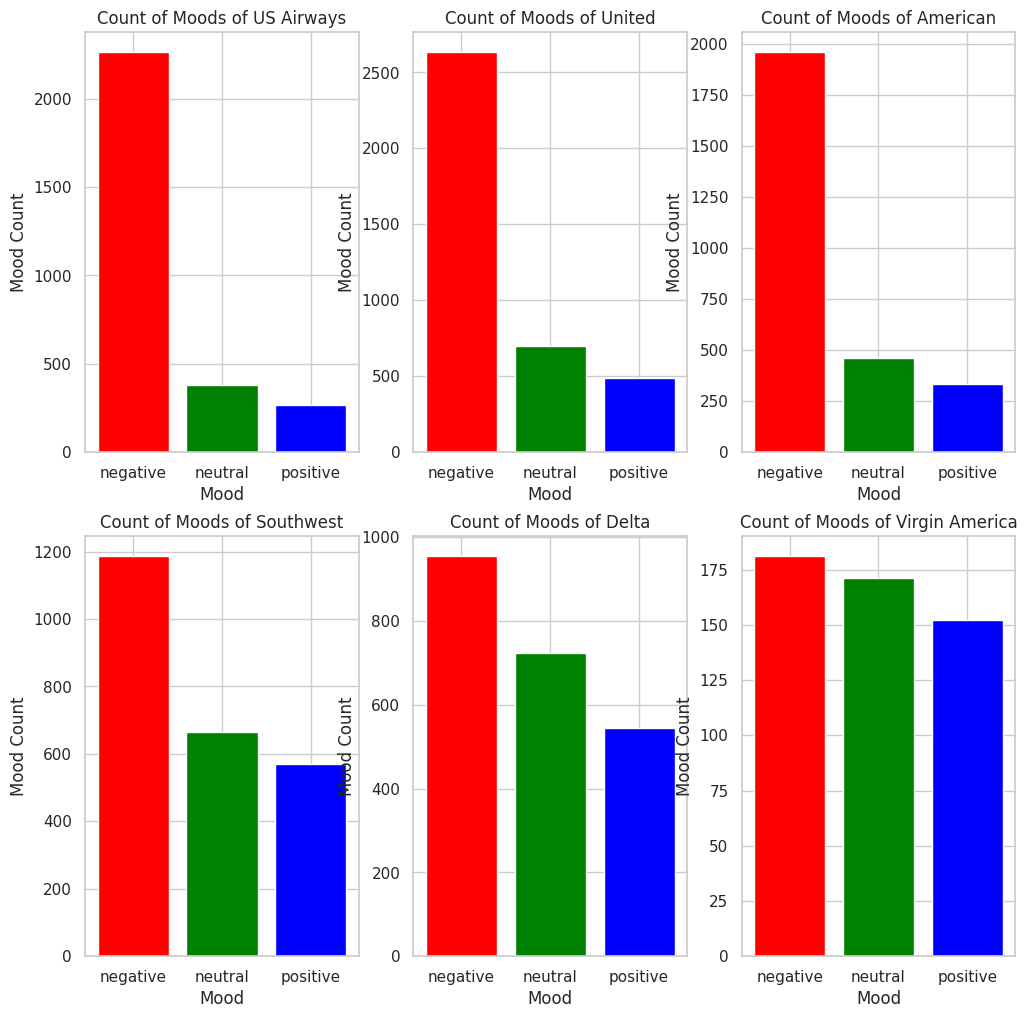

In [17]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

**United**, **US Airways**, **American** reçoivent majoritairement des réactions négatives.

Les tweets concernant **Virgin America** présentent la répartition la plus équilibrée.

### Mots les plus utilisés dans les tweets positifs et négatifs et neutres 

- L’objectif est tout d’abord de se faire une idée des mots les plus fréquents dans les tweets négatifs.  
- Se faire une idée des mots les plus fréquents dans les tweets positifs.  

---


In [33]:
from wordcloud import WordCloud,STOPWORDS


### Nuage de mots pour les sentiments négatifs des tweets

Le **nuage de mots** est un excellent outil pour visualiser les données NLP.  
Plus un mot apparaît en grand dans l’image du nuage de mots, plus sa fréquence est élevée dans nos données textuelles.


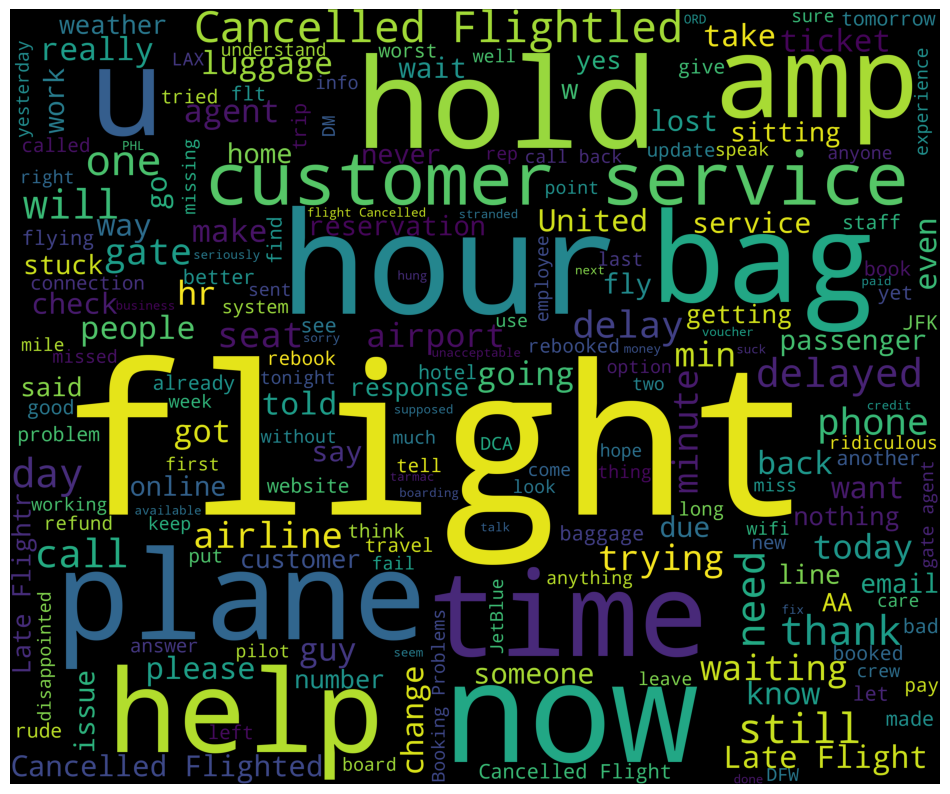

In [34]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Des mots comme **flight**, **help**, **plane**, **time**, **hour**, **bag** ,**hold** sont logiquement présents parmi les mots les plus fréquents des tweets négatifs.  

### Nuage de mots pour les sentiments positifs des tweets


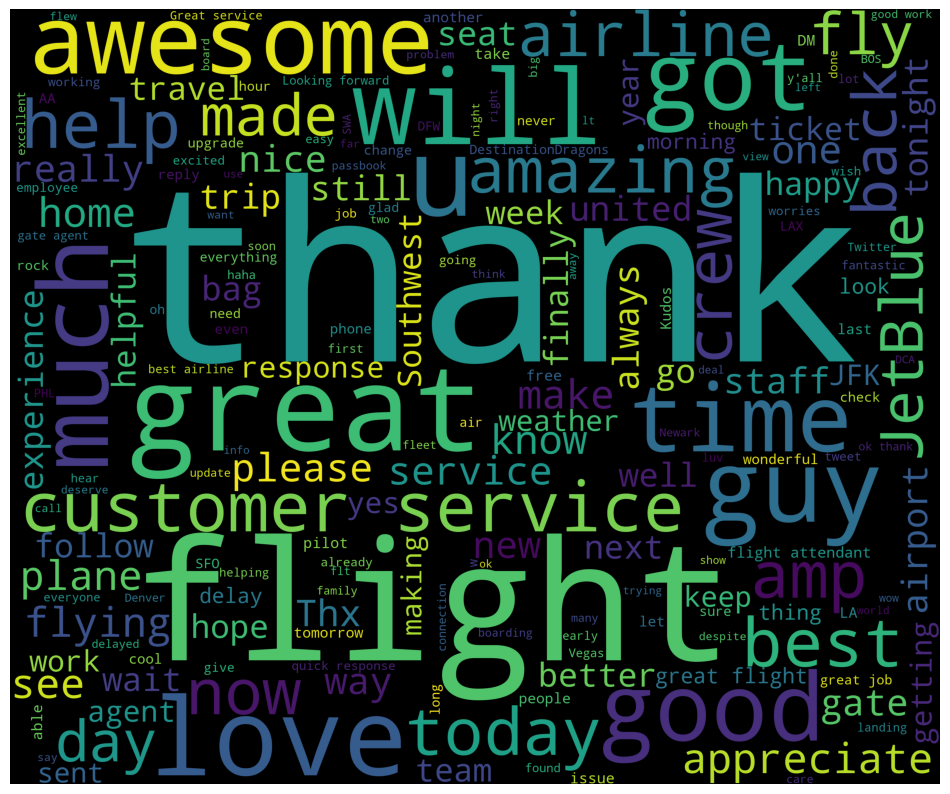

In [ ]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Des mots comme **Thanks**, **best**, **customer**, **love**, **flying**, **good** sont logiquement présents parmi les mots les plus fréquents des tweets positifs.  



### Nuage de mots pour les sentiments neutres des tweets

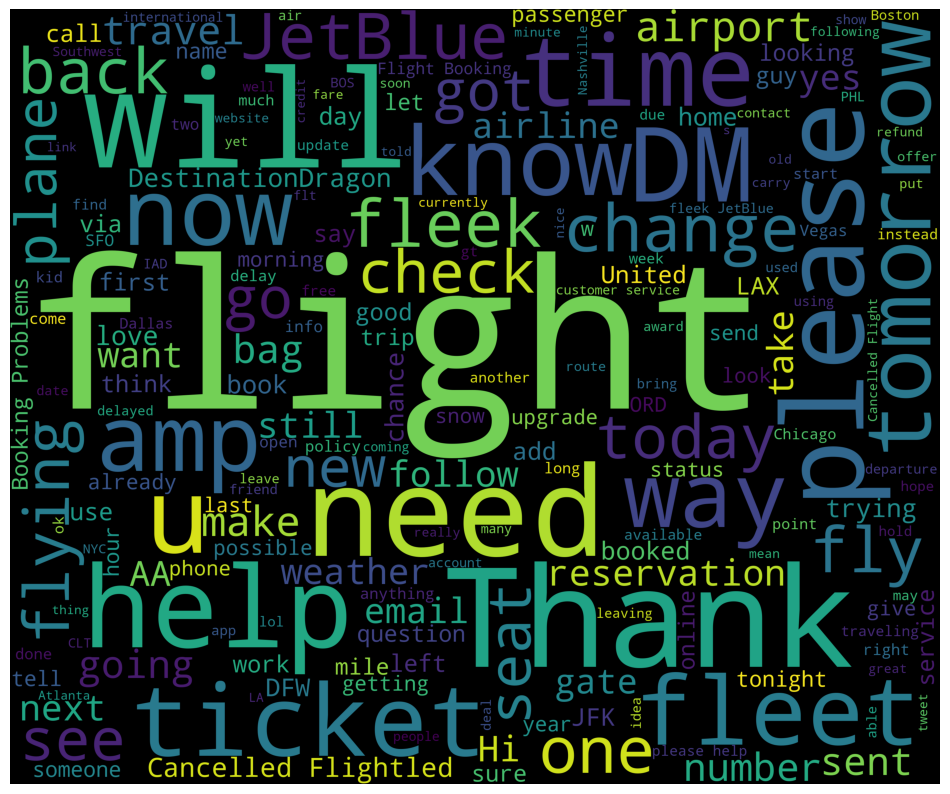

In [ ]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Des mots comme **ticket**, **need**, **flight**, **will**, **help**, **thank** sont logiquement présents parmi les mots les plus fréquents des tweets positifs.  
